### Melt/Unpivot and Pivot

In [ ]:
# weather.txt data from https://code.webartifex.biz/alexander/tidy-data

In [61]:
!head -10 weather.txt

MX000017004195504TMAX  310  I  310  I  310  I  320  I  330  I  320  I  320  I  330  I  330  I  330  I  330  I  320  I  310  I  310  I  320  I  320  I  320  I  310  I  310  I  320  I  320  I  330  I  330  I  330  I  330  I  330  I  330  I  340  I  330  I  320  I-9999   
MX000017004195504TMIN  150  I  150  I  160  I  150  I  160  I  160  I  160  I  160  I  160  I  170  I  170  I  160  I  160  I  160  I  170  I  170  I  160  I  160  I  160  I  160  I  170  I  170  I  170  I  170  I  180  I  190  I  190  I  170  I  180  I  160  I-9999   
MX000017004195504PRCP    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    0  I    6  I-9999   
MX000017004195505TMAX  310  I  310  I  310  I  300  I  300  I  300  I  310  I  310  I  310  I  300  I  300  I  310  I  300  I  310  I  320  I  320  I  330  I  330  I  330  I  300  I  350  I 

In [62]:
# ghcn file format detailed here:
# https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt

# ------------------------------
# Variable   Columns   Type
# ------------------------------
# ID            1-11   Character
# YEAR         12-15   Integer
# MONTH        16-17   Integer
# ELEMENT      18-21   Character
# VALUE1       22-26   Integer
# MFLAG1       27-27   Character
# QFLAG1       28-28   Character
# SFLAG1       29-29   Character
# VALUE2       30-34   Integer
# MFLAG2       35-35   Character
# QFLAG2       36-36   Character
# SFLAG2       37-37   Character
#   .           .          .
#   .           .          .
#   .           .          .
# VALUE31    262-266   Integer
# MFLAG31    267-267   Character
# QFLAG31    268-268   Character
# SFLAG31    269-269   Character
# ------------------------------

# parsing using extract_groups
# h/t https://stackoverflow.com/a/78545671

import polars as pl

# Read file as a single-column DataFrame
wdf = pl.read_csv(
    "weather.txt",
    separator="\n",
    has_header=False,
    new_columns=["data"],
)

# Extract columns with regex
days = "".join([f"(?<value{d}>.{{5}})(?<mflag{d}>.{{1}})(?<qflag{d}>.{{1}})(?<sflag{d}>.{{1}})" for d in range(1,32)])
wdf = wdf.select(
    pl.col("data").str.extract_groups(
        r"^(?<id>.{11})(?<year>.{4})(?<month>.{2})(?<element>.{4})" + days + "$"
    )
).unnest("data")

wdf = wdf.with_columns(pl.col("year","month",r"^value\d*$").str.strip_chars().cast(pl.Int32),
                      pl.col('element').str.to_lowercase())

shape: (1_714, 128)
┌─────────────┬──────┬───────┬─────────┬───┬─────────┬─────────┬─────────┬─────────┐
│ id          ┆ year ┆ month ┆ element ┆ … ┆ value31 ┆ mflag31 ┆ qflag31 ┆ sflag31 │
│ ---         ┆ ---  ┆ ---   ┆ ---     ┆   ┆ ---     ┆ ---     ┆ ---     ┆ ---     │
│ str         ┆ i32  ┆ i32   ┆ str     ┆   ┆ i32     ┆ str     ┆ str     ┆ str     │
╞═════════════╪══════╪═══════╪═════════╪═══╪═════════╪═════════╪═════════╪═════════╡
│ MX000017004 ┆ 1955 ┆ 4     ┆ tmax    ┆ … ┆ -9999   ┆         ┆         ┆         │
│ MX000017004 ┆ 1955 ┆ 4     ┆ tmin    ┆ … ┆ -9999   ┆         ┆         ┆         │
│ MX000017004 ┆ 1955 ┆ 4     ┆ prcp    ┆ … ┆ -9999   ┆         ┆         ┆         │
│ MX000017004 ┆ 1955 ┆ 5     ┆ tmax    ┆ … ┆ 290     ┆         ┆         ┆ I       │
│ MX000017004 ┆ 1955 ┆ 5     ┆ tmin    ┆ … ┆ 160     ┆         ┆         ┆ I       │
│ …           ┆ …    ┆ …     ┆ …       ┆ … ┆ …       ┆ …       ┆ …       ┆ …       │
│ MX000017004 ┆ 2011 ┆ 3     ┆ tmin    ┆ … ┆ 170     ┆         ┆         ┆ S       │
│ MX000017004 ┆ 2011 ┆ 3     ┆ prcp    ┆ … ┆ 0       ┆         ┆         ┆ S       │
│ MX000017004 ┆ 2011 ┆ 4     ┆ tmax    ┆ … ┆ -9999   ┆         ┆         ┆         │
│ MX000017004 ┆ 2011 ┆ 4     ┆ tmin    ┆ … ┆ -9999   ┆         ┆         ┆         │
│ MX000017004 ┆ 2011 ┆ 4     ┆ prcp    ┆ … ┆ -9999   ┆         ┆         ┆         │
└─────────────┴──────┴───────┴─────────┴───┴─────────┴─────────┴─────────┴─────────┘

In [63]:
import math
wdf = (wdf.filter(pl.col("element").str.to_lowercase().is_in(["tmax","tmin"]))
          .with_columns(pl.col(r"^value\d*$").cast(pl.Float64).replace(-9999,math.nan) / 10)
          .select(pl.col("id","year","month","element",r"^value.*$"))
).rename(lambda c: f"d{c[5:]}" if c.startswith('value') else c)

shape: (1_129, 35)
┌─────────────┬──────┬───────┬─────────┬───┬──────┬──────┬──────┬──────┐
│ id          ┆ year ┆ month ┆ element ┆ … ┆ d28  ┆ d29  ┆ d30  ┆ d31  │
│ ---         ┆ ---  ┆ ---   ┆ ---     ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---  │
│ str         ┆ i32  ┆ i32   ┆ str     ┆   ┆ f64  ┆ f64  ┆ f64  ┆ f64  │
╞═════════════╪══════╪═══════╪═════════╪═══╪══════╪══════╪══════╪══════╡
│ MX000017004 ┆ 1955 ┆ 4     ┆ tmax    ┆ … ┆ 34.0 ┆ 33.0 ┆ 32.0 ┆ NaN  │
│ MX000017004 ┆ 1955 ┆ 4     ┆ tmin    ┆ … ┆ 17.0 ┆ 18.0 ┆ 16.0 ┆ NaN  │
│ MX000017004 ┆ 1955 ┆ 5     ┆ tmax    ┆ … ┆ 32.0 ┆ 31.0 ┆ 30.0 ┆ 29.0 │
│ MX000017004 ┆ 1955 ┆ 5     ┆ tmin    ┆ … ┆ 15.0 ┆ 17.0 ┆ 15.0 ┆ 16.0 │
│ MX000017004 ┆ 1955 ┆ 6     ┆ tmax    ┆ … ┆ 27.0 ┆ 29.0 ┆ 27.0 ┆ NaN  │
│ …           ┆ …    ┆ …     ┆ …       ┆ … ┆ …    ┆ …    ┆ …    ┆ …    │
│ MX000017004 ┆ 2011 ┆ 2     ┆ tmin    ┆ … ┆ NaN  ┆ NaN  ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011 ┆ 3     ┆ tmax    ┆ … ┆ NaN  ┆ NaN  ┆ NaN  ┆ 36.5 │
│ MX000017004 ┆ 2011 ┆ 3     ┆ tmin    ┆ … ┆ NaN  ┆ NaN  ┆ NaN  ┆ 17.0 │
│ MX000017004 ┆ 2011 ┆ 4     ┆ tmax    ┆ … ┆ NaN  ┆ NaN  ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011 ┆ 4     ┆ tmin    ┆ … ┆ NaN  ┆ NaN  ┆ NaN  ┆ NaN  │
└─────────────┴──────┴───────┴─────────┴───┴──────┴──────┴──────┴──────┘

In [64]:
wdf_up = wdf.unpivot(index=['id','year','month','element'])

shape: (34_999, 6)
┌─────────────┬──────┬───────┬─────────┬──────────┬───────┐
│ id          ┆ year ┆ month ┆ element ┆ variable ┆ value │
│ ---         ┆ ---  ┆ ---   ┆ ---     ┆ ---      ┆ ---   │
│ str         ┆ i32  ┆ i32   ┆ str     ┆ str      ┆ f64   │
╞═════════════╪══════╪═══════╪═════════╪══════════╪═══════╡
│ MX000017004 ┆ 1955 ┆ 4     ┆ tmax    ┆ d1       ┆ 31.0  │
│ MX000017004 ┆ 1955 ┆ 4     ┆ tmin    ┆ d1       ┆ 15.0  │
│ MX000017004 ┆ 1955 ┆ 5     ┆ tmax    ┆ d1       ┆ 31.0  │
│ MX000017004 ┆ 1955 ┆ 5     ┆ tmin    ┆ d1       ┆ 20.0  │
│ MX000017004 ┆ 1955 ┆ 6     ┆ tmax    ┆ d1       ┆ 30.0  │
│ …           ┆ …    ┆ …     ┆ …       ┆ …        ┆ …     │
│ MX000017004 ┆ 2011 ┆ 2     ┆ tmin    ┆ d31      ┆ NaN   │
│ MX000017004 ┆ 2011 ┆ 3     ┆ tmax    ┆ d31      ┆ 36.5  │
│ MX000017004 ┆ 2011 ┆ 3     ┆ tmin    ┆ d31      ┆ 17.0  │
│ MX000017004 ┆ 2011 ┆ 4     ┆ tmax    ┆ d31      ┆ NaN   │
│ MX000017004 ┆ 2011 ┆ 4     ┆ tmin    ┆ d31      ┆ NaN   │
└─────────────┴──────┴───────┴─────────┴──────────┴───────┘

In [65]:
wdf_p = wdf_up.pivot('element', index=['id','year','month','variable'], values='value')

shape: (17_515, 6)
┌─────────────┬──────┬───────┬──────────┬──────┬──────┐
│ id          ┆ year ┆ month ┆ variable ┆ tmax ┆ tmin │
│ ---         ┆ ---  ┆ ---   ┆ ---      ┆ ---  ┆ ---  │
│ str         ┆ i32  ┆ i32   ┆ str      ┆ f64  ┆ f64  │
╞═════════════╪══════╪═══════╪══════════╪══════╪══════╡
│ MX000017004 ┆ 1955 ┆ 4     ┆ d1       ┆ 31.0 ┆ 15.0 │
│ MX000017004 ┆ 1955 ┆ 5     ┆ d1       ┆ 31.0 ┆ 20.0 │
│ MX000017004 ┆ 1955 ┆ 6     ┆ d1       ┆ 30.0 ┆ 16.0 │
│ MX000017004 ┆ 1955 ┆ 7     ┆ d1       ┆ 27.0 ┆ 15.0 │
│ MX000017004 ┆ 1955 ┆ 8     ┆ d1       ┆ 23.0 ┆ 14.0 │
│ …           ┆ …    ┆ …     ┆ …        ┆ …    ┆ …    │
│ MX000017004 ┆ 2010 ┆ 12    ┆ d31      ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011 ┆ 1     ┆ d31      ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011 ┆ 2     ┆ d31      ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011 ┆ 3     ┆ d31      ┆ 36.5 ┆ 17.0 │
│ MX000017004 ┆ 2011 ┆ 4     ┆ d31      ┆ NaN  ┆ NaN  │
└─────────────┴──────┴───────┴──────────┴──────┴──────┘

In [66]:
wdf_out = (wdf_p.with_columns(pl.date(pl.col('year'),pl.col('month'),pl.col('variable').str.slice(1).cast(pl.Int32)))
      .filter(pl.col('date').is_not_null())
      .select('id','date','tmin','tmax')
).sort('date')

shape: (17_204, 4)
┌─────────────┬────────────┬──────┬──────┐
│ id          ┆ date       ┆ tmin ┆ tmax │
│ ---         ┆ ---        ┆ ---  ┆ ---  │
│ str         ┆ date       ┆ f64  ┆ f64  │
╞═════════════╪════════════╪══════╪══════╡
│ MX000017004 ┆ 1955-04-01 ┆ 15.0 ┆ 31.0 │
│ MX000017004 ┆ 1955-04-02 ┆ 15.0 ┆ 31.0 │
│ MX000017004 ┆ 1955-04-03 ┆ 16.0 ┆ 31.0 │
│ MX000017004 ┆ 1955-04-04 ┆ 15.0 ┆ 32.0 │
│ MX000017004 ┆ 1955-04-05 ┆ 16.0 ┆ 33.0 │
│ …           ┆ …          ┆ …    ┆ …    │
│ MX000017004 ┆ 2011-04-26 ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011-04-27 ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011-04-28 ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011-04-29 ┆ NaN  ┆ NaN  │
│ MX000017004 ┆ 2011-04-30 ┆ NaN  ┆ NaN  │
└─────────────┴────────────┴──────┴──────┘

In [ ]:
wdf_out.group_by(pl.col('date').dt.year()).agg(pl.col('tmin','tmax').drop_nans().mean()).sort('date')

In [67]:
import pandas as pd
wdfa = wdf.to_pandas()

id  year  month element    d1    d2    d3    d4    d5    d6  \
0     MX000017004  1955      4    tmax  31.0  31.0  31.0  32.0  33.0  32.0   
1     MX000017004  1955      4    tmin  15.0  15.0  16.0  15.0  16.0  16.0   
2     MX000017004  1955      5    tmax  31.0  31.0  31.0  30.0  30.0  30.0   
3     MX000017004  1955      5    tmin  20.0  16.0  16.0  15.0  15.0  15.0   
4     MX000017004  1955      6    tmax  30.0  29.0  28.0  27.0  28.0  26.0   
...           ...   ...    ...     ...   ...   ...   ...   ...   ...   ...   
1124  MX000017004  2011      2    tmin   NaN   NaN   NaN   NaN   NaN   NaN   
1125  MX000017004  2011      3    tmax   NaN   NaN   NaN   NaN  33.2   NaN   
1126  MX000017004  2011      3    tmin   NaN   NaN   NaN   NaN  14.8   NaN   
1127  MX000017004  2011      4    tmax   NaN  35.0   NaN   NaN   NaN   NaN   
1128  MX000017004  2011      4    tmin   NaN  16.8   NaN   NaN   NaN   NaN   

      ...   d22   d23   d24   d25   d26   d27   d28   d29   d30   d31  
0     ...  33.0  33.0  33.0  33.0  33.0  33.0  34.0  33.0  32.0   NaN  
1     ...  17.0  17.0  17.0  18.0  19.0  19.0  17.0  18.0  16.0   NaN  
2     ...  33.0  34.0  35.0  33.0  31.0  31.0  32.0  31.0  30.0  29.0  
3     ...  17.0  19.0  19.0  19.0  18.0  16.0  15.0  17.0  15.0  16.0  
4     ...  29.0  27.0  27.0  27.0  28.0  30.0  27.0  29.0  27.0   NaN  
...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1124  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1125  ...   NaN   NaN   NaN   NaN  33.2   NaN   NaN   NaN   NaN  36.5  
1126  ...   NaN   NaN   NaN   NaN  16.2   NaN   NaN   NaN   NaN  17.0  
1127  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1128  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1129 rows x 35 columns]

In [68]:
wdfa_melt = wdfa.melt(id_vars=['id','year','month','element'])

id  year  month element variable  value
0      MX000017004  1955      4    tmax       d1   31.0
1      MX000017004  1955      4    tmin       d1   15.0
2      MX000017004  1955      5    tmax       d1   31.0
3      MX000017004  1955      5    tmin       d1   20.0
4      MX000017004  1955      6    tmax       d1   30.0
...            ...   ...    ...     ...      ...    ...
34994  MX000017004  2011      2    tmin      d31    NaN
34995  MX000017004  2011      3    tmax      d31   36.5
34996  MX000017004  2011      3    tmin      d31   17.0
34997  MX000017004  2011      4    tmax      d31    NaN
34998  MX000017004  2011      4    tmin      d31    NaN

[34999 rows x 6 columns]

In [69]:
wdfa_pivot = wdfa_melt.pivot(columns='element',index=['id','year','month','variable'],values='value').reset_index()

element           id  year  month variable  tmax  tmin
0        MX000017004  1955      4       d1  31.0  15.0
1        MX000017004  1955      4      d10  33.0  17.0
2        MX000017004  1955      4      d11  33.0  17.0
3        MX000017004  1955      4      d12  32.0  16.0
4        MX000017004  1955      4      d13  31.0  16.0
...              ...   ...    ...      ...   ...   ...
17510    MX000017004  2011      4       d5   NaN   NaN
17511    MX000017004  2011      4       d6   NaN   NaN
17512    MX000017004  2011      4       d7   NaN   NaN
17513    MX000017004  2011      4       d8   NaN   NaN
17514    MX000017004  2011      4       d9   NaN   NaN

[17515 rows x 6 columns]

In [70]:
wdfa_pivot = wdfa_pivot.assign(day=lambda df: df.variable.str[1:].astype('int'))

element           id  year  month variable  tmax  tmin  day
0        MX000017004  1955      4       d1  31.0  15.0    1
1        MX000017004  1955      4      d10  33.0  17.0   10
2        MX000017004  1955      4      d11  33.0  17.0   11
3        MX000017004  1955      4      d12  32.0  16.0   12
4        MX000017004  1955      4      d13  31.0  16.0   13
...              ...   ...    ...      ...   ...   ...  ...
17510    MX000017004  2011      4       d5   NaN   NaN    5
17511    MX000017004  2011      4       d6   NaN   NaN    6
17512    MX000017004  2011      4       d7   NaN   NaN    7
17513    MX000017004  2011      4       d8   NaN   NaN    8
17514    MX000017004  2011      4       d9   NaN   NaN    9

[17515 rows x 7 columns]

In [71]:
wdfa_out = wdfa_pivot.assign(date=pd.to_datetime(wdfa_pivot[['year','month','day']],errors='coerce'))[['id','date','tmin','tmax']].query('date.notnull()').sort_values('date')

element           id       date  tmin  tmax
0        MX000017004 1955-04-01  15.0  31.0
11       MX000017004 1955-04-02  15.0  31.0
22       MX000017004 1955-04-03  16.0  31.0
25       MX000017004 1955-04-04  15.0  32.0
26       MX000017004 1955-04-05  16.0  33.0
...              ...        ...   ...   ...
17502    MX000017004 2011-04-26   NaN   NaN
17503    MX000017004 2011-04-27   NaN   NaN
17504    MX000017004 2011-04-28   NaN   NaN
17505    MX000017004 2011-04-29   NaN   NaN
17507    MX000017004 2011-04-30   NaN   NaN

[17204 rows x 4 columns]

In [72]:
wdfa_out.groupby(wdfa_out['date'].dt.year)[['tmin','tmax']].mean()

element       tmin       tmax
date                         
1955     14.461818  26.647273
1956     13.764881  26.526786
1957     14.883582  27.913433
1958     14.695890  26.723288
1959     15.109589  26.802740
1960     15.338798  27.519126
1961     14.400000  26.989041
1962     14.169604  28.002193
1963     14.156934  23.952555
1964     14.883582  25.895522
1965     14.581522  24.873188
1966     14.325275  25.731044
1967     14.986849  27.406301
1968     14.738251  26.098634
1969     15.793132  26.959178
1970     15.183014  27.375342
1971     13.975092  25.882051
1972     14.431694  25.725410
1973     15.153968  25.882166
1974     14.888268  26.262570
1975     14.826027  25.853425
1976     15.005556  25.848611
1977     14.954795  26.610411
1978     15.053571  26.532967
1979     14.148352  27.968407
1980     15.692623  26.822404
1981     12.333333  24.666667
1982     13.833333  33.000000
1983     10.200000  27.300000
1985      8.300000  26.300000
1986     13.443750  29.606250
1987     15.300000  30.362500
1988     15.242308  30.565517
1989     13.589809  29.883333
1990     13.353676  28.583654
1991     14.747387  28.954054
1992     14.032698  28.200000
1993     14.473000  29.608571
1994     13.891324  28.620800
1995     12.712351  27.896939
1996     12.215200  27.966667
1997     13.961404  27.749123
1998     15.146739  32.223913
1999     11.366667  26.769444
2000     13.952147  28.984663
2001     14.000515  29.129381
2002     13.974096  29.958434
2003     13.855782  30.220408
2004     11.918644  29.215254
2005     13.909091  32.091919
2006     13.980220  31.435165
2007     14.207547  31.026415
2008     14.466667  31.596970
2009     13.373913  29.113043
2010     14.651515  29.190909
2011     14.170000  32.100000

### String Methods

In [73]:
import polars as pl
df = pl.read_csv('penguins_lter.csv')

shape: (344, 17)
┌───────────┬────────┬─────────────┬────────┬───┬────────┬─────────────┬─────────────┬─────────────┐
│ studyName ┆ Sample ┆ Species     ┆ Region ┆ … ┆ Sex    ┆ Delta 15 N  ┆ Delta 13 C  ┆ Comments    │
│ ---       ┆ Number ┆ ---         ┆ ---    ┆   ┆ ---    ┆ (o/oo)      ┆ (o/oo)      ┆ ---         │
│ str       ┆ ---    ┆ str         ┆ str    ┆   ┆ str    ┆ ---         ┆ ---         ┆ str         │
│           ┆ i64    ┆             ┆        ┆   ┆        ┆ f64         ┆ f64         ┆             │
╞═══════════╪════════╪═════════════╪════════╪═══╪════════╪═════════════╪═════════════╪═════════════╡
│ PAL0708   ┆ 1      ┆ Adelie      ┆ Anvers ┆ … ┆ MALE   ┆ null        ┆ null        ┆ Not enough  │
│           ┆        ┆ Penguin     ┆        ┆   ┆        ┆             ┆             ┆ blood for   │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆ isotopes.   │
│           ┆        ┆ ade…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0708   ┆ 2      ┆ Adelie      ┆ Anvers ┆ … ┆ FEMALE ┆ 8.94956     ┆ -24.69454   ┆ null        │
│           ┆        ┆ Penguin     ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ ade…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0708   ┆ 3      ┆ Adelie      ┆ Anvers ┆ … ┆ FEMALE ┆ 8.36821     ┆ -25.33302   ┆ null        │
│           ┆        ┆ Penguin     ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ ade…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0708   ┆ 4      ┆ Adelie      ┆ Anvers ┆ … ┆ null   ┆ null        ┆ null        ┆ Adult not   │
│           ┆        ┆ Penguin     ┆        ┆   ┆        ┆             ┆             ┆ sampled.    │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ ade…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0708   ┆ 5      ┆ Adelie      ┆ Anvers ┆ … ┆ FEMALE ┆ 8.76651     ┆ -25.32426   ┆ null        │
│           ┆        ┆ Penguin     ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ ade…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ …         ┆ …      ┆ …           ┆ …      ┆ … ┆ …      ┆ …           ┆ …           ┆ …           │
│ PAL0910   ┆ 120    ┆ Gentoo      ┆ Anvers ┆ … ┆ null   ┆ null        ┆ null        ┆ null        │
│           ┆        ┆ penguin     ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ pap…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0910   ┆ 121    ┆ Gentoo      ┆ Anvers ┆ … ┆ FEMALE ┆ 8.41151     ┆ -26.13832   ┆ null        │
│           ┆        ┆ penguin     ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ pap…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0910   ┆ 122    ┆ Gentoo      ┆ Anvers ┆ … ┆ MALE   ┆ 8.30166     ┆ -26.04117   ┆ null        │
│           ┆        ┆ penguin     ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ (Pygoscelis ┆        ┆   ┆        ┆             ┆             ┆             │
│           ┆        ┆ pap…        ┆        ┆   ┆        ┆             ┆             ┆             │
│ PAL0910   ┆ 123    ┆ Gentoo      ┆ Anvers 

In [74]:
df['Species'].str.split('(')

shape: (344,)
Series: 'Species' [list[str]]
[
	["Adelie Penguin ", "Pygoscelis adeliae)"]
	["Adelie Penguin ", "Pygoscelis adeliae)"]
	["Adelie Penguin ", "Pygoscelis adeliae)"]
	["Adelie Penguin ", "Pygoscelis adeliae)"]
	["Adelie Penguin ", "Pygoscelis adeliae)"]
	…
	["Gentoo penguin ", "Pygoscelis papua)"]
	["Gentoo penguin ", "Pygoscelis papua)"]
	["Gentoo penguin ", "Pygoscelis papua)"]
	["Gentoo penguin ", "Pygoscelis papua)"]
	["Gentoo penguin ", "Pygoscelis papua)"]
]

In [75]:
df['Species'].str.split('(').list[0]

shape: (344,)
Series: 'Species' [str]
[
	"Adelie Penguin "
	"Adelie Penguin "
	"Adelie Penguin "
	"Adelie Penguin "
	"Adelie Penguin "
	…
	"Gentoo penguin "
	"Gentoo penguin "
	"Gentoo penguin "
	"Gentoo penguin "
	"Gentoo penguin "
]

In [76]:
df['Species'].str.split('(').list[0].str.strip_chars()

shape: (344,)
Series: 'Species' [str]
[
	"Adelie Penguin"
	"Adelie Penguin"
	"Adelie Penguin"
	"Adelie Penguin"
	"Adelie Penguin"
	…
	"Gentoo penguin"
	"Gentoo penguin"
	"Gentoo penguin"
	"Gentoo penguin"
	"Gentoo penguin"
]

In [77]:
df['Species'].str.split('(').list[1]

shape: (344,)
Series: 'Species' [str]
[
	"Pygoscelis adeliae)"
	"Pygoscelis adeliae)"
	"Pygoscelis adeliae)"
	"Pygoscelis adeliae)"
	"Pygoscelis adeliae)"
	…
	"Pygoscelis papua)"
	"Pygoscelis papua)"
	"Pygoscelis papua)"
	"Pygoscelis papua)"
	"Pygoscelis papua)"
]

In [78]:
df['Species'].str.split('(').list[1].str.head(-1)

shape: (344,)
Series: 'Species' [str]
[
	"Pygoscelis adeliae"
	"Pygoscelis adeliae"
	"Pygoscelis adeliae"
	"Pygoscelis adeliae"
	"Pygoscelis adeliae"
	…
	"Pygoscelis papua"
	"Pygoscelis papua"
	"Pygoscelis papua"
	"Pygoscelis papua"
	"Pygoscelis papua"
]

In [79]:
df.with_columns(pl.col('Species').str.split('(').list[0].str.strip_chars(),
                pl.col('Species').str.split('(').list[1].str.head(-1).alias("ScientificSpecies"))

shape: (344, 18)
┌───────────┬────────┬─────────┬────────┬───┬─────────────┬─────────────┬─────────────┬────────────┐
│ studyName ┆ Sample ┆ Species ┆ Region ┆ … ┆ Delta 15 N  ┆ Delta 13 C  ┆ Comments    ┆ Scientific │
│ ---       ┆ Number ┆ ---     ┆ ---    ┆   ┆ (o/oo)      ┆ (o/oo)      ┆ ---         ┆ Species    │
│ str       ┆ ---    ┆ str     ┆ str    ┆   ┆ ---         ┆ ---         ┆ str         ┆ ---        │
│           ┆ i64    ┆         ┆        ┆   ┆ f64         ┆ f64         ┆             ┆ str        │
╞═══════════╪════════╪═════════╪════════╪═══╪═════════════╪═════════════╪═════════════╪════════════╡
│ PAL0708   ┆ 1      ┆ Adelie  ┆ Anvers ┆ … ┆ null        ┆ null        ┆ Not enough  ┆ Pygoscelis │
│           ┆        ┆ Penguin ┆        ┆   ┆             ┆             ┆ blood for   ┆ adeliae    │
│           ┆        ┆         ┆        ┆   ┆             ┆             ┆ isotopes.   ┆            │
│ PAL0708   ┆ 2      ┆ Adelie  ┆ Anvers ┆ … ┆ 8.94956     ┆ -24.69454   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ Penguin ┆        ┆   ┆             ┆             ┆             ┆ adeliae    │
│ PAL0708   ┆ 3      ┆ Adelie  ┆ Anvers ┆ … ┆ 8.36821     ┆ -25.33302   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ Penguin ┆        ┆   ┆             ┆             ┆             ┆ adeliae    │
│ PAL0708   ┆ 4      ┆ Adelie  ┆ Anvers ┆ … ┆ null        ┆ null        ┆ Adult not   ┆ Pygoscelis │
│           ┆        ┆ Penguin ┆        ┆   ┆             ┆             ┆ sampled.    ┆ adeliae    │
│ PAL0708   ┆ 5      ┆ Adelie  ┆ Anvers ┆ … ┆ 8.76651     ┆ -25.32426   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ Penguin ┆        ┆   ┆             ┆             ┆             ┆ adeliae    │
│ …         ┆ …      ┆ …       ┆ …      ┆ … ┆ …           ┆ …           ┆ …           ┆ …          │
│ PAL0910   ┆ 120    ┆ Gentoo  ┆ Anvers ┆ … ┆ null        ┆ null        ┆ null        ┆ Pygoscelis │
│           ┆        ┆ penguin ┆        ┆   ┆             ┆             ┆             ┆ papua      │
│ PAL0910   ┆ 121    ┆ Gentoo  ┆ Anvers ┆ … ┆ 8.41151     ┆ -26.13832   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ penguin ┆        ┆   ┆             ┆             ┆             ┆ papua      │
│ PAL0910   ┆ 122    ┆ Gentoo  ┆ Anvers ┆ … ┆ 8.30166     ┆ -26.04117   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ penguin ┆        ┆   ┆             ┆             ┆             ┆ papua      │
│ PAL0910   ┆ 123    ┆ Gentoo  ┆ Anvers ┆ … ┆ 8.24246     ┆ -26.11969   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ penguin ┆        ┆   ┆             ┆             ┆             ┆ papua      │
│ PAL0910   ┆ 124    ┆ Gentoo  ┆ Anvers ┆ … ┆ 8.3639      ┆ -26.15531   ┆ null        ┆ Pygoscelis │
│           ┆        ┆ penguin ┆        ┆   ┆             ┆             ┆             ┆ papua      │
└───────────┴────────┴─────────┴────────┴───┴─────────────┴─────────────┴─────────────┴────────────┘

In [80]:
import pandas as pd
dfa = pd.read_csv('penguins_lter.csv')

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [81]:
dfa.Species.str.split('(')

0      [Adelie Penguin , Pygoscelis adeliae)]
1      [Adelie Penguin , Pygoscelis adeliae)]
2      [Adelie Penguin , Pygoscelis adeliae)]
3      [Adelie Penguin , Pygoscelis adeliae)]
4      [Adelie Penguin , Pygoscelis adeliae)]
                        ...                  
339      [Gentoo penguin , Pygoscelis papua)]
340      [Gentoo penguin , Pygoscelis papua)]
341      [Gentoo penguin , Pygoscelis papua)]
342      [Gentoo penguin , Pygoscelis papua)]
343      [Gentoo penguin , Pygoscelis papua)]
Name: Species, Length: 344, dtype: object

In [82]:
dfa.Species.str.split('(').str[0]

0      Adelie Penguin 
1      Adelie Penguin 
2      Adelie Penguin 
3      Adelie Penguin 
4      Adelie Penguin 
            ...       
339    Gentoo penguin 
340    Gentoo penguin 
341    Gentoo penguin 
342    Gentoo penguin 
343    Gentoo penguin 
Name: Species, Length: 344, dtype: object

In [83]:
dfa.Species.str.split('(').str[0].loc[0]

'Adelie Penguin '

In [84]:
dfa.Species.str.split('(').str[0].str.strip()

0      Adelie Penguin
1      Adelie Penguin
2      Adelie Penguin
3      Adelie Penguin
4      Adelie Penguin
            ...      
339    Gentoo penguin
340    Gentoo penguin
341    Gentoo penguin
342    Gentoo penguin
343    Gentoo penguin
Name: Species, Length: 344, dtype: object

In [85]:
dfa.Species.str.split('(').str[1]

0      Pygoscelis adeliae)
1      Pygoscelis adeliae)
2      Pygoscelis adeliae)
3      Pygoscelis adeliae)
4      Pygoscelis adeliae)
              ...         
339      Pygoscelis papua)
340      Pygoscelis papua)
341      Pygoscelis papua)
342      Pygoscelis papua)
343      Pygoscelis papua)
Name: Species, Length: 344, dtype: object

In [86]:
dfa.Species.str.split('(').str[1].str[:-1]

0      Pygoscelis adeliae
1      Pygoscelis adeliae
2      Pygoscelis adeliae
3      Pygoscelis adeliae
4      Pygoscelis adeliae
              ...        
339      Pygoscelis papua
340      Pygoscelis papua
341      Pygoscelis papua
342      Pygoscelis papua
343      Pygoscelis papua
Name: Species, Length: 344, dtype: object

In [87]:
dfa.assign(Species=dfa.Species.str.split('(').str[0].str.strip(),
           ScientificSpecies=dfa.Species.str.split('(').str[1].str[:-1])

studyName  Sample Number         Species  Region     Island  \
0     PAL0708              1  Adelie Penguin  Anvers  Torgersen   
1     PAL0708              2  Adelie Penguin  Anvers  Torgersen   
2     PAL0708              3  Adelie Penguin  Anvers  Torgersen   
3     PAL0708              4  Adelie Penguin  Anvers  Torgersen   
4     PAL0708              5  Adelie Penguin  Anvers  Torgersen   
..        ...            ...             ...     ...        ...   
339   PAL0910            120  Gentoo penguin  Anvers     Biscoe   
340   PAL0910            121  Gentoo penguin  Anvers     Biscoe   
341   PAL0910            122  Gentoo penguin  Anvers     Biscoe   
342   PAL0910            123  Gentoo penguin  Anvers     Biscoe   
343   PAL0910            124  Gentoo penguin  Anvers     Biscoe   

                  Stage Individual ID Clutch Completion  Date Egg  \
0    Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..                  ...           ...               ...       ...   
339  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments   ScientificSpecies  
0    Not enough blood for isotopes.  Pygoscelis adeliae  
1                               NaN  Pygoscelis adeliae  
2                               NaN  Pygoscelis adeliae  
3                Adult not sampled.  Pygoscelis adeliae  
4                               NaN  Pygoscelis adeliae  
..                              ...                 ...  
339                             NaN    Pygoscelis papua  
340                             NaN    Pygoscelis papua  
341                             NaN    Pygoscelis papua  
342                             NaN    Pygoscelis papua  
343                             NaN    Pygoscelis papua  

[344 rows x 18 columns]

### DateTime Methods

In [88]:
df['Date Egg'].str.to_date()

InvalidOperationError: conversion from `str` to `date` failed in column 'Date Egg' for 226 out of 344 values: ["11/16/07", "11/16/07", … "11/22/09"]

You might want to try:
- setting `strict=False` to set values that cannot be converted to `null`
- using `str.strptime`, `str.to_date`, or `str.to_datetime` and providing a format string

In [89]:
df['Date Egg'].str.to_date('%m/%d/%y')

shape: (344,)
Series: 'Date Egg' [date]
[
	2007-11-11
	2007-11-11
	2007-11-16
	2007-11-16
	2007-11-16
	…
	2009-12-01
	2009-11-22
	2009-11-22
	2009-11-22
	2009-11-22
]

In [90]:
df['Date Egg'].str.to_date('%m/%d/%y').dt.year()

shape: (344,)
Series: 'Date Egg' [i32]
[
	2007
	2007
	2007
	2007
	2007
	…
	2009
	2009
	2009
	2009
	2009
]

In [91]:
pd.to_datetime(dfa['Date Egg'])

/var/folders/wh/31nq3r6s42jgshq2j9skw_vw0000gn/T/ipykernel_49349/3421390971.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(dfa['Date Egg'])


0     2007-11-11
1     2007-11-11
2     2007-11-16
3     2007-11-16
4     2007-11-16
         ...    
339   2009-12-01
340   2009-11-22
341   2009-11-22
342   2009-11-22
343   2009-11-22
Name: Date Egg, Length: 344, dtype: datetime64[ns]

In [92]:
pd.to_datetime(dfa['Date Egg']).dt.year

/var/folders/wh/31nq3r6s42jgshq2j9skw_vw0000gn/T/ipykernel_49349/3709367808.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(dfa['Date Egg']).dt.year


0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
339    2009
340    2009
341    2009
342    2009
343    2009
Name: Date Egg, Length: 344, dtype: int32

## matplotlib Visualization

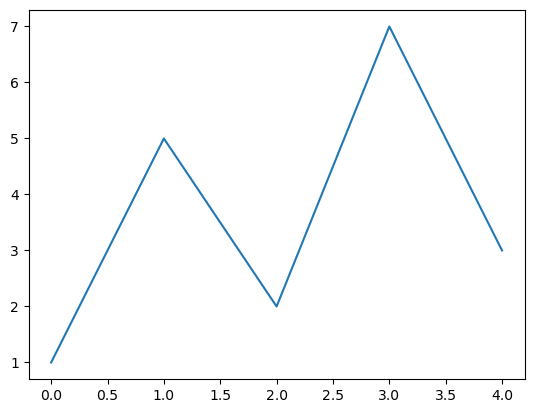

In [93]:
import matplotlib.pyplot as plt
plt.plot([1,5,2,7,3]) # just y values

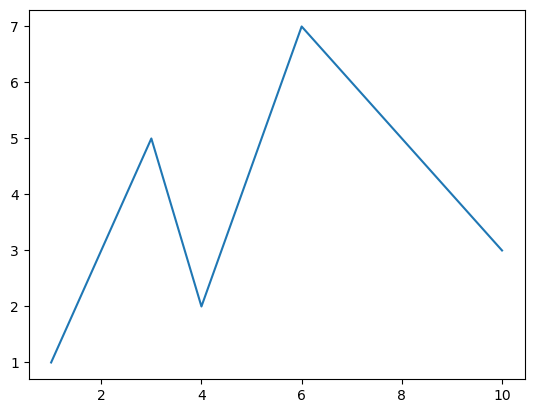

In [94]:
plt.plot([1,3,4,6,10],[1,5,2,7,3]) # x and y values

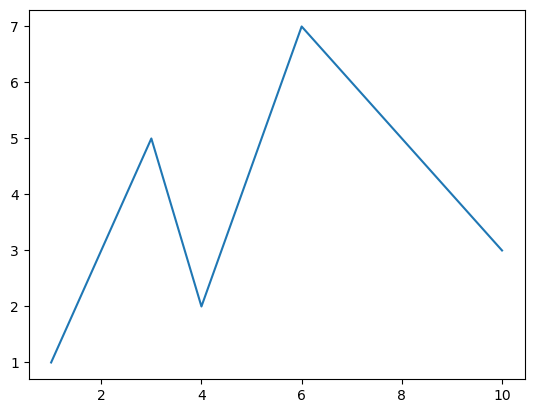

In [95]:
import numpy as np
plt.plot(np.array([1,3,4,6,10]),np.array([1,5,2,7,3])) # x and y values

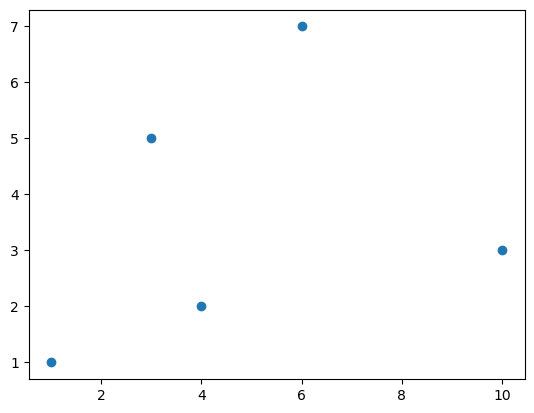

In [96]:
plt.scatter([1,3,4,6,10],[1,5,2,7,3]) # different version

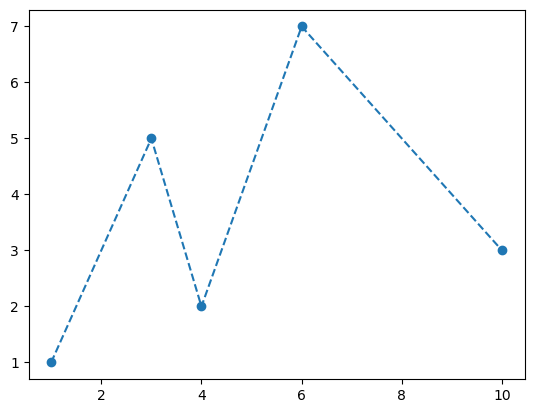

In [97]:
plt.plot([1,3,4,6,10],[1,5,2,7,3], 'o--') # add format string

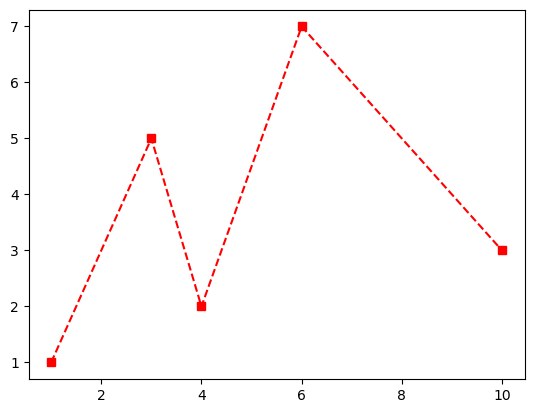

In [98]:
# red color
# square marker
# dashed line
plt.plot([1,3,4,6,10],[1,5,2,7,3],'rs--')

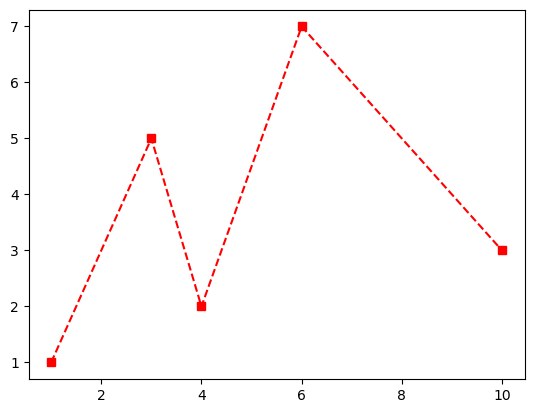

In [99]:
plt.plot([1,3,4,6,10],[1,5,2,7,3], color='red', marker='s', linestyle='dashed')

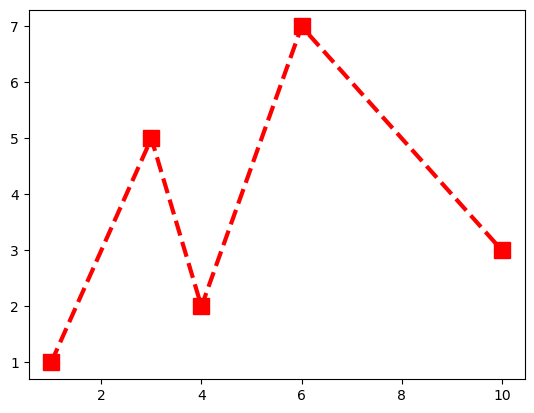

In [103]:
plt.plot([1,3,4,6,10],[1,5,2,7,3], 
         color='red', marker='s', linestyle='dashed',
         linewidth=3, markersize=12)

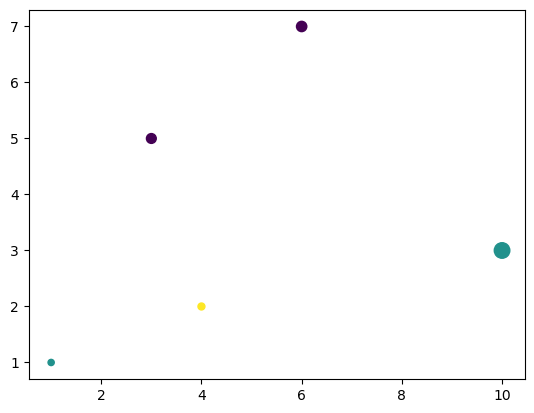

In [104]:
data = {'age': [1,3,4,6,10],
        'num_jumps': [1,5,2,7,3],
        'weight': [20,50,25,55,125],
        'num_scoops': [3,2,4,2,3]}
plt.scatter(x='age',y='num_jumps', c='num_scoops', s='weight', data=data) #,c='num_scoops',s='weight',data=data)

# Other matplotlib plots

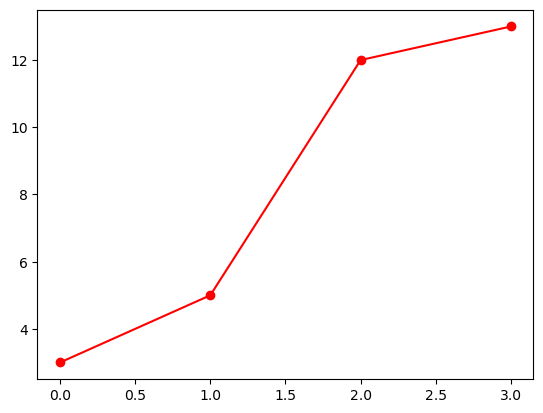

In [105]:
import matplotlib.pyplot as plt
plt.plot([3,5,12,13],'ro-')

<BarContainer object of 3 artists>

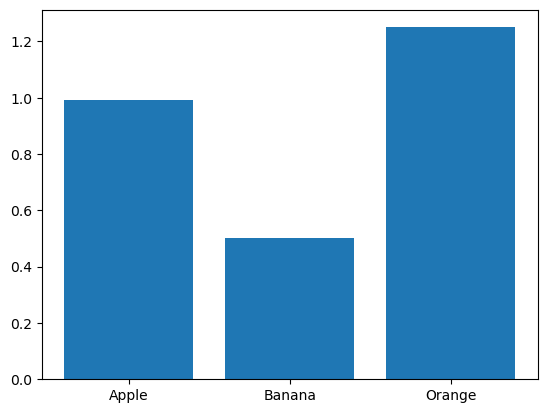

In [106]:
plt.bar(['Apple','Banana','Orange'],[0.99,0.50,1.25])

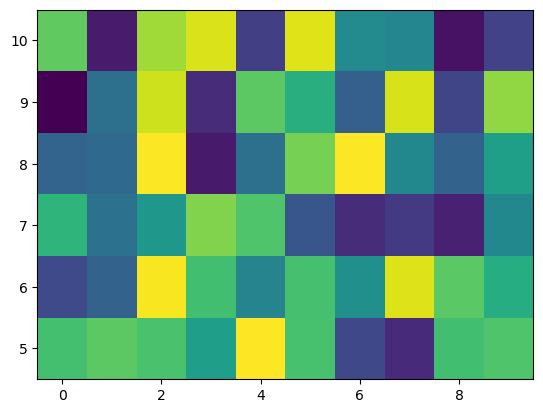

In [107]:
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

plt.pcolormesh(x, y, Z)

([<matplotlib.patches.Wedge at 0x12c82a330>,
 [Text(0.8899186825075615, 0.6465637930815537, 'Apple'),
  Text(-0.8899187390319623, 0.6465637152823859, 'Banana'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Orange'),
  Text(1.046162345950534, -0.33991814590467956, 'Pear')])

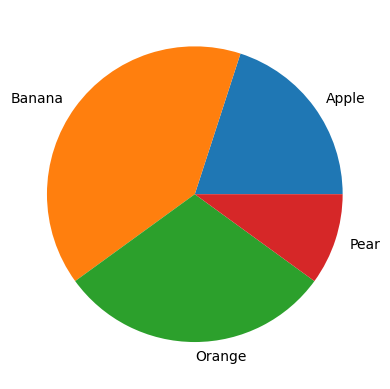

In [108]:
plt.pie([20,40,30,10], labels=['Apple','Banana','Orange','Pear'])

Text(0.5, 1.0, 'Kangaroo Jumps Today')

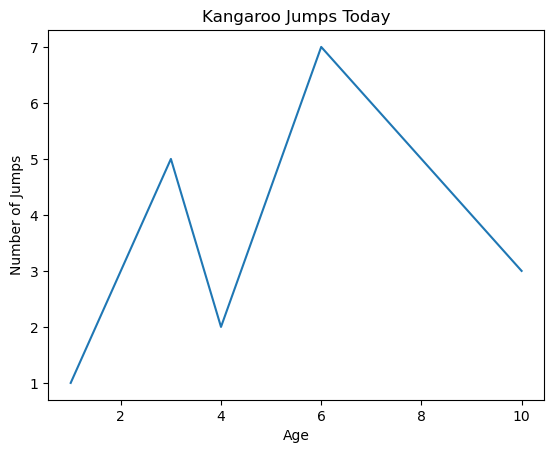

In [109]:
plt.plot([1,3,4,6,10],[1,5,2,7,3])
plt.xlabel('Age')
plt.ylabel('Number of Jumps')
plt.title('Kangaroo Jumps Today')

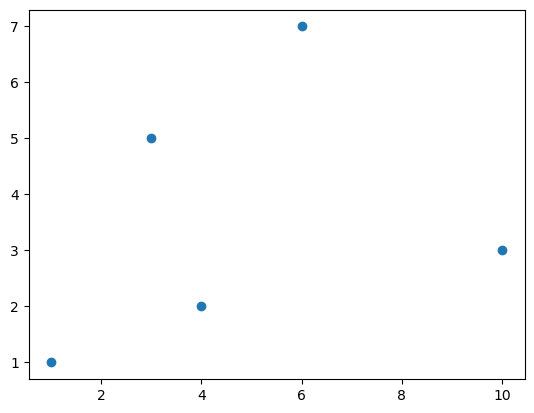

In [110]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])

Text(0.5, 1.0, 'Kangaroo Jumps Today')

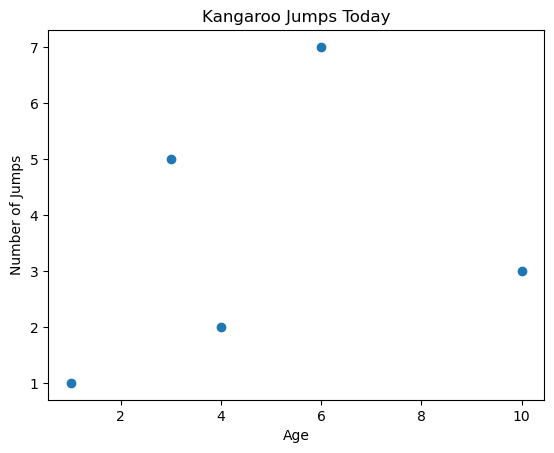

In [111]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')

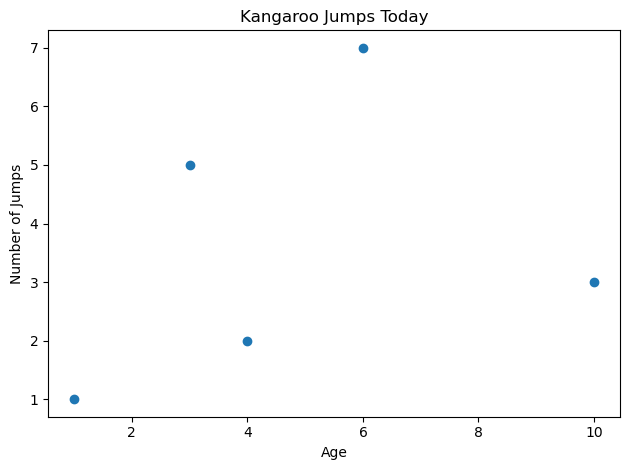

In [112]:
fig, ax = plt.subplots()
ax.scatter([1,3,4,6,10],[1,5,2,7,3])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Jumps')
ax.set_title('Kangaroo Jumps Today')
fig.tight_layout()

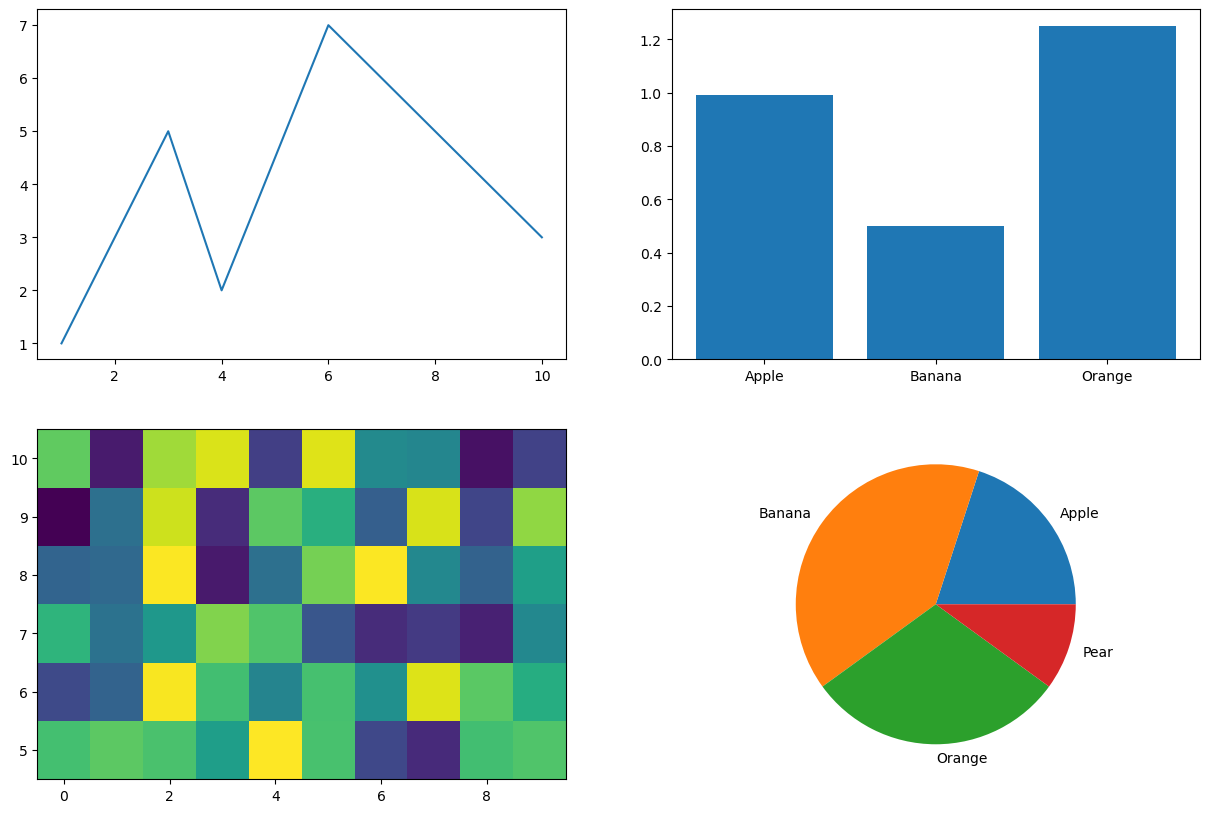

In [113]:
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot([1,3,4,6,10],[1,5,2,7,3])
# ax[0,0].set_xlabel('Age')
ax[0,1].bar(['Apple','Banana','Orange'],[0.99,0.50,1.25])
ax[1,0].pcolormesh(x, y, Z)
ax[1,1].pie([20,40,30,10], labels=['Apple','Banana','Orange','Pear'])
# plt.xlabel("Age")
fig.savefig('vis.png')

# Plotting with pandas

In [114]:
import pandas as pd
fruit = pd.DataFrame({'name': ['Apple','Banana','Orange','Pear'],
         'count': [20,40,30,10],
         'price': [0.99,0.50,1.25,1.25]})

name  count  price
0   Apple     20   0.99
1  Banana     40   0.50
2  Orange     30   1.25
3    Pear     10   1.25

<Axes: >

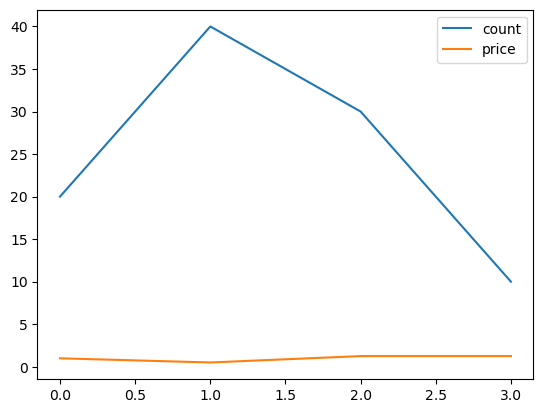

In [115]:
fruit.plot()

<Axes: xlabel='name'>

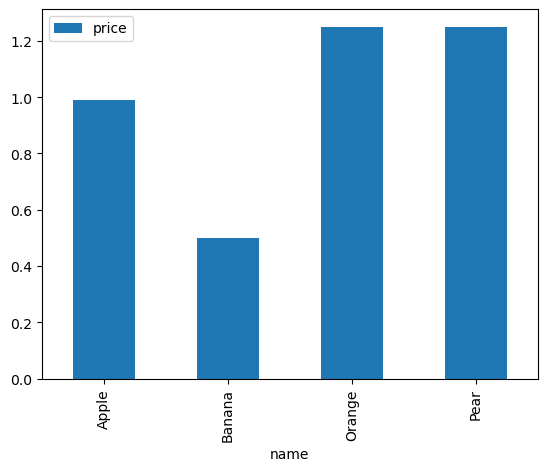

In [118]:
fruit.plot(kind='bar',x='name',y='price')

<BarContainer object of 4 artists>

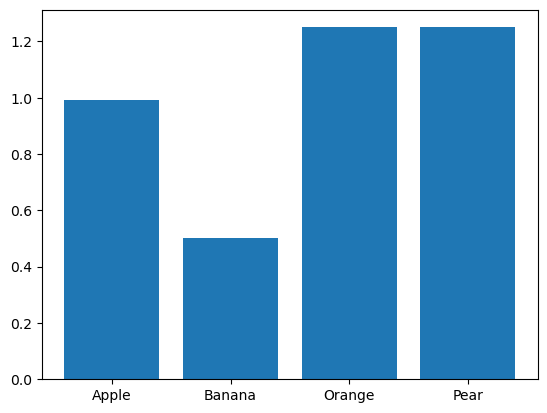

In [120]:
import matplotlib.pyplot as plt

plt.bar(x='name',height='price',data=fruit)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Apple', 'Banana', 'Orange', 'Pear'], dtype=object)

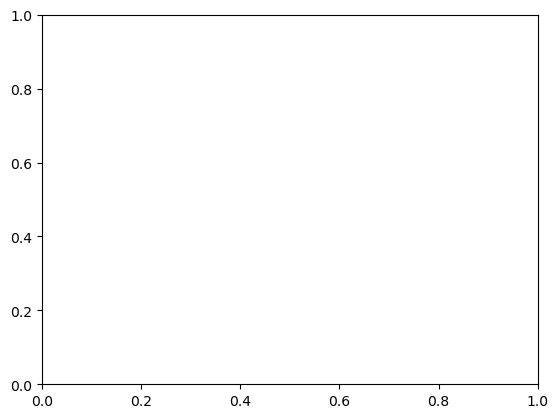

In [121]:
fruit.plot.scatter(x='price',y='count',c='name')

Text(0.5, 1.0, 'Fruit Prices')

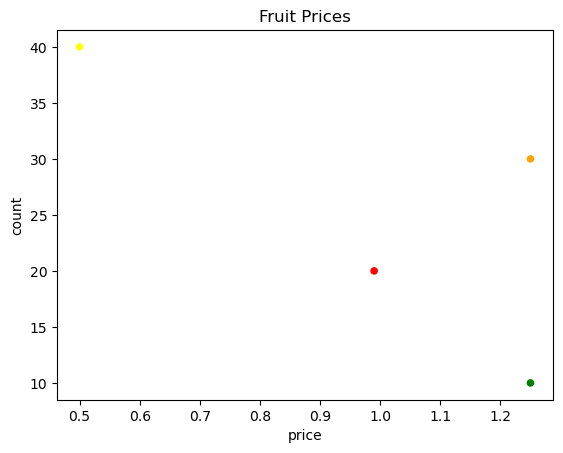

In [122]:
colors = {'Apple': 'red','Orange': 'orange','Banana': 'yellow','Pear': 'green'}
ax = fruit.plot.scatter(x='price',y='count', c=fruit['name'].map(colors))
ax.set_title('Fruit Prices')

In [123]:
# may need to install seaborn
# %conda install -c conda-forge seaborn

import seaborn as sns
sns.scatterplot(x='price',y='count',hue='name', data=fruit)

ModuleNotFoundError: No module named 'seaborn'

# Altair

In [2]:
# may need to install altair
# %conda install -c conda-forge altair

import altair as alt
import pandas as pd

In [3]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

x  y
0   1  1
1   3  5
2   4  2
3   6  7
4  10  3

In [4]:
alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

### Attribute Types

In [6]:
data = pd.DataFrame({
    'age': [1,3,4,6,10],
    'weight': [20,50,25,55,125],
    'zoo_area': [1,3,3,1,2],
    'num_scoops': [3,2,4,2,3]
})

age  weight  zoo_area  num_scoops
0    1      20         1           3
1    3      50         3           2
2    4      25         3           4
3    6      55         1           2
4   10     125         2           3

In [7]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area' #:Q
)

alt.Chart(...)

In [8]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:O'
)

alt.Chart(...)

In [9]:
alt.Chart(data).mark_point(filled=True, size=100, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N'
)

alt.Chart(...)

In [10]:
# Bubble Chart

data = pd.DataFrame({
    'age': [1,3,4,6,10, 11,7,5,9,9],
    'weight': [20,50,25,55,125, 20,50,25,55,125],
    'zoo_area': [1,3,3,1,2, 1,3,3,1,2],
    'num_scoops': [3,2,4,2,3,10,5,7,90,120]
})

alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

### Concatenation, Layering, and Repetition

In [11]:
c1 = alt.Chart(data).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='age',
    y='weight',
    color='zoo_area:N',
    size='num_scoops'
)

alt.Chart(...)

In [12]:
c2 = alt.Chart(data).mark_bar().encode(
    x='zoo_area:N',
    y='count()'
)

alt.Chart(...)

In [13]:
c1 | c2

alt.HConcatChart(...)

In [14]:
c1 & c2

alt.VConcatChart(...)

In [15]:
data = pd.DataFrame({
  'x': [1,3,4,6,10],
  'y': [1,5,2,7,3]
})

lines = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
)

dots = alt.Chart(data).mark_point(size=150, shape='triangle', color='red',filled=True).encode(
    x='x',
    y='y'
)

lines

alt.Chart(...)

In [16]:
dots

alt.Chart(...)

In [17]:
lines + dots

alt.LayerChart(...)

In [18]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X("Beak Length (mm):Q", scale=alt.Scale(zero=False)),
    alt.Y("Beak Depth (mm):Q", scale=alt.Scale(zero=False)),
    color='Species:N'
)

alt.Chart(...)

In [19]:
alt.Chart(penguins).mark_point().encode(
    alt.X("Beak Length (mm):Q", scale=alt.Scale(zero=False)),
    alt.Y("Beak Depth (mm):Q", scale=alt.Scale(zero=False)),
    color='Species:N'
).interactive()

alt.Chart(...)

In [20]:
penguins = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/penguins.json'

alt.Chart(penguins).mark_point().encode(
    alt.X(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    color='Species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)'],
    column=['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)']
)

alt.RepeatChart(...)

In [ ]:
# %conda install -c conda-forge vega_datasets

In [21]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.income.url

alt.Chart(source).mark_geoshape().encode(
    shape='geo:G',
    color='pct:Q',
    tooltip=['name:N', 'pct:Q'],
    facet=alt.Facet('group:N', columns=2),
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=states, key='id'),
    as_='geo'
).properties(
    width=300,
    height=175,
).project(
    type='albersUsa'
)

alt.Chart(...)